In [6]:

import pandas as pd
disaster = pd.read_csv('titanic_disaster.csv', delimiter=',')
def load_data(filename):
    return pd.read_csv(filename)
filename = "titanic_disaster.csv"
tidisaster = load_data(filename)
tidisaster.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


PassengerId    177
Survived       177
Pclass         177
Name           177
Sex            177
Age              0
SibSp          177
Parch          177
Ticket         177
Fare           177
Cabin           19
Embarked       177
dtype: int64
PassengerId    687
Survived       687
Pclass         687
Name           687
Sex            687
Age            529
SibSp          687
Parch          687
Ticket         687
Fare           687
Cabin            0
Embarked       687
dtype: int64
PassengerId    2
Survived       2
Pclass         2
Name           2
Sex            2
Age            2
SibSp          2
Parch          2
Ticket         2
Fare           2
Cabin          2
Embarked       0
dtype: int64


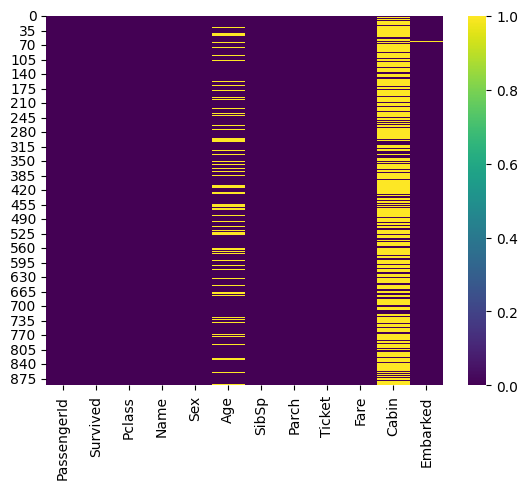

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt
dfage = tidisaster[tidisaster['Age'].isna()]
print(dfage.count())

dfcabin = tidisaster[tidisaster['Cabin'].isna()]
print(dfcabin.count())

dfembarked = tidisaster[tidisaster['Embarked'].isna()]
print(dfembarked.count())

sns.heatmap(tidisaster.isna(), cmap='viridis')
plt.show()

In [8]:
tidisaster[['firstName','secondName']]=tidisaster['Name'].str.split(',' , expand = True)
tidisaster_splitname = tidisaster.drop('Name', axis=1)
tidisaster_splitname.head(5)


,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,firstName,secondName
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,Braund,Mr. Owen Harris
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C,Cumings,Mrs. John Bradley (Florence Briggs Thayer)
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Heikkinen,Miss. Laina
3,4,1,1,female,35.0,1,0,113803,53.1000,C123,S,Futrelle,Mrs. Jacques Heath (Lily May Peel)
4,5,0,3,male,35.0,0,0,373450,8.0500,NaN,S,Allen,Mr. William Henry


In [9]:
def substitute_Sex(x_df):
     mapping = {'male':'M', 'female':'F'}
     x_df['Sex']=x_df['Sex'].map(mapping)
     return x_df
tidisaster5 = tidisaster_splitname.pipe(substitute_Sex)
tidisaster5.head(5)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,firstName,secondName
0,1,0,3,M,22.0,1,0,A/5 21171,7.2500,NaN,S,Braund,Mr. Owen Harris
1,2,1,1,F,38.0,1,0,PC 17599,71.2833,C85,C,Cumings,Mrs. John Bradley (Florence Briggs Thayer)
2,3,1,3,F,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Heikkinen,Miss. Laina
3,4,1,1,F,35.0,1,0,113803,53.1000,C123,S,Futrelle,Mrs. Jacques Heath (Lily May Peel)
4,5,0,3,M,35.0,0,0,373450,8.0500,NaN,S,Allen,Mr. William Henry


C:\Users\Admin\AppData\Local\Temp\ipykernel_67144\1378554990.py:4: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  tidisaster5['Age'][tidisaster5['Pclass'] == 1] = tidisaster5['Age'][tidisaster5['Pclass'] == 1].fillna(tidisaster5['Age'][tidisa

<Axes: >

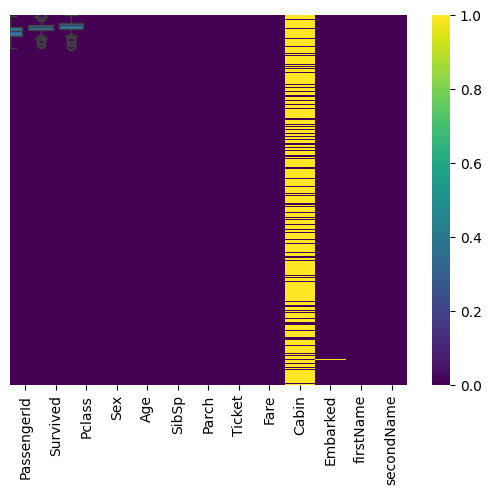

In [10]:
import seaborn as sns
sns.boxplot(y = 'Age', x = 'Pclass', data=tidisaster5)

tidisaster5['Age'][tidisaster5['Pclass'] == 1] = tidisaster5['Age'][tidisaster5['Pclass'] == 1].fillna(tidisaster5['Age'][tidisaster5['Pclass'] == 1].median(), inplace = False)
tidisaster5['Age'][tidisaster5['Pclass'] == 2] = tidisaster5['Age'][tidisaster5['Pclass'] == 2].fillna(tidisaster5['Age'][tidisaster5['Pclass'] == 2].median(), inplace = False)
tidisaster5['Age'][tidisaster5['Pclass'] == 3] = tidisaster5['Age'][tidisaster5['Pclass'] == 3].fillna(tidisaster5['Age'][tidisaster5['Pclass'] == 3].median(), inplace = False)
sns.heatmap(tidisaster5.isna(), yticklabels=False, cbar=True, cmap='viridis')

In [11]:
tidisaster5.loc[(tidisaster5['Age']<=12), 'Agegroup'] = 'Kid'
tidisaster5.loc[(tidisaster5['Age']>12) & (tidisaster5['Age']<18), 'Agegroup'] = 'Teen'
tidisaster5.loc[(tidisaster5['Age']>=18) & (tidisaster5['Age']<=60), 'Agegroup'] = 'Adult'
tidisaster5.loc[(tidisaster5['Age']>60), 'Agegroup'] = 'Older'
tidisaster5.head(5)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,firstName,secondName,Agegroup
0,1,0,3,M,22.0,1,0,A/5 21171,7.2500,NaN,S,Braund,Mr. Owen Harris,Adult
1,2,1,1,F,38.0,1,0,PC 17599,71.2833,C85,C,Cumings,Mrs. John Bradley (Florence Briggs Thayer),Adult
2,3,1,3,F,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Heikkinen,Miss. Laina,Adult
3,4,1,1,F,35.0,1,0,113803,53.1000,C123,S,Futrelle,Mrs. Jacques Heath (Lily May Peel),Adult
4,5,0,3,M,35.0,0,0,373450,8.0500,NaN,S,Allen,Mr. William Henry,Adult


In [12]:
listNamePrefix=[]
for index,row in tidisaster5.iterrows():
    vitri = row['secondName'].strip().find(' ')
    secondname = row['secondName'].strip()

    namePrefix=secondname[vitri+1:]
    listNamePrefix.append(namePrefix)

cotNamePrefix=pd.DataFrame(listNamePrefix, columns=['namePrefix'])
tidisaster5=pd.concat([tidisaster5,cotNamePrefix],axis=1,sort=False)
tidisaster.head(6)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,firstName,secondName
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Braund,Mr. Owen Harris
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Cumings,Mrs. John Bradley (Florence Briggs Thayer)
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Heikkinen,Miss. Laina
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Futrelle,Mrs. Jacques Heath (Lily May Peel)
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Allen,Mr. William Henry
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,Moran,Mr. James


In [13]:
tidisaster5['familySize'] = tidisaster5['SibSp'] + tidisaster5['Parch'] + 1
tidisaster5.head(5)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,firstName,secondName,Agegroup,namePrefix,familySize
0,1,0,3,M,22.0,1,0,A/5 21171,7.2500,NaN,S,Braund,Mr. Owen Harris,Adult,Owen Harris,2
1,2,1,1,F,38.0,1,0,PC 17599,71.2833,C85,C,Cumings,Mrs. John Bradley (Florence Briggs Thayer),Adult,John Bradley (Florence Briggs Thayer),2
2,3,1,3,F,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Heikkinen,Miss. Laina,Adult,Laina,1
3,4,1,1,F,35.0,1,0,113803,53.1000,C123,S,Futrelle,Mrs. Jacques Heath (Lily May Peel),Adult,Jacques Heath (Lily May Peel),2
4,5,0,3,M,35.0,0,0,373450,8.0500,NaN,S,Allen,Mr. William Henry,Adult,William Henry,1


In [14]:
tidisaster5.loc[(tidisaster5['familySize'] == 0), 'Alone'] = 1
tidisaster5.loc[(tidisaster5['familySize'] > 0), 'Alone'] = 0
tidisaster5.head(5)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,firstName,secondName,Agegroup,namePrefix,familySize,Alone
0,1,0,3,M,22.0,1,0,A/5 21171,7.2500,NaN,S,Braund,Mr. Owen Harris,Adult,Owen Harris,2,0.0
1,2,1,1,F,38.0,1,0,PC 17599,71.2833,C85,C,Cumings,Mrs. John Bradley (Florence Briggs Thayer),Adult,John Bradley (Florence Briggs Thayer),2,0.0
2,3,1,3,F,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Heikkinen,Miss. Laina,Adult,Laina,1,0.0
3,4,1,1,F,35.0,1,0,113803,53.1000,C123,S,Futrelle,Mrs. Jacques Heath (Lily May Peel),Adult,Jacques Heath (Lily May Peel),2,0.0
4,5,0,3,M,35.0,0,0,373450,8.0500,NaN,S,Allen,Mr. William Henry,Adult,William Henry,1,0.0


In [15]:
tidisaster5['Cabin'].fillna('Unknow', inplace=True)

listCabinType=[]
for index, row in tidisaster5.iterrows():
    cabinType=row['Cabin'].strip()[0]
    listCabinType.append(cabinType)

cotTypeCabin=pd.DataFrame(listCabinType, columns=['typeCabin'])

tidisaster5 = pd.concat([tidisaster5, cotTypeCabin], axis=1, sort=False)
tidisaster5.head(5)

C:\Users\Admin\AppData\Local\Temp\ipykernel_67144\951663136.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  tidisaster5['Cabin'].fillna('Unknow', inplace=True)


,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,firstName,secondName,Agegroup,namePrefix,familySize,Alone,typeCabin
0,1,0,3,M,22.0,1,0,A/5 21171,7.2500,Unknow,S,Braund,Mr. Owen Harris,Adult,Owen Harris,2,0.0,U
1,2,1,1,F,38.0,1,0,PC 17599,71.2833,C85,C,Cumings,Mrs. John Bradley (Florence Briggs Thayer),Adult,John Bradley (Florence Briggs Thayer),2,0.0,C
2,3,1,3,F,26.0,0,0,STON/O2. 3101282,7.9250,Unknow,S,Heikkinen,Miss. Laina,Adult,Laina,1,0.0,U
3,4,1,1,F,35.0,1,0,113803,53.1000,C123,S,Futrelle,Mrs. Jacques Heath (Lily May Peel),Adult,Jacques Heath (Lily May Peel),2,0.0,C
4,5,0,3,M,35.0,0,0,373450,8.0500,Unknow,S,Allen,Mr. William Henry,Adult,William Henry,1,0.0,U


C:\Users\Admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\categorical.py:379: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  ax.set_xlim(-.5, n - .5, auto=None)
C:\Users\Admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\categorical.py:379: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  ax.set_xlim(-.5, n - .5, auto=None)


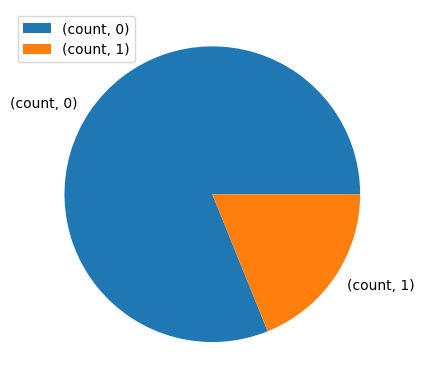

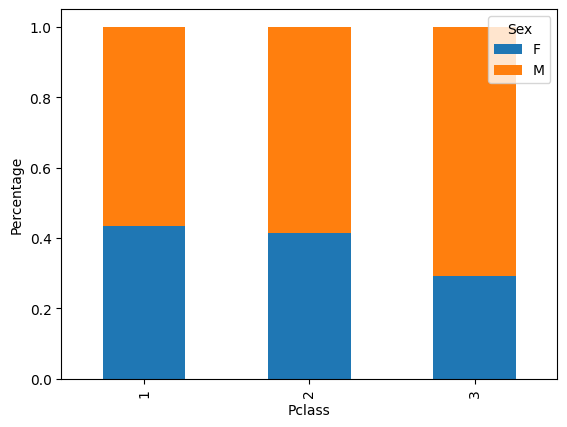

In [18]:
tidisaster5.groupby('Sex')['Survived'].agg(['count'])
df=tidisaster5.groupby(['Sex','Survived'])['Sex'].agg(['count'])

df_nam=tidisaster5[tidisaster5['Sex'] == 'M']
df_nu=tidisaster5[tidisaster5['Sex'] == 'N']

df_nam_thongke=df_nam.groupby('Survived')['Survived'].agg(['count'])
df_nu_thongke=df_nu.groupby('Survived')['Survived'].agg(['count'])

df_nam_thongke.unstack().plot.pie(y='count')
df_nu_thongke.unstack().plot.pie(y='count') 

sns.barplot(x='Sex', y='Survived', data= tidisaster5)
sns.barplot(x='Pclass', y='Survived', data= tidisaster5)
tab = pd.crosstab(tidisaster5['Pclass'], tidisaster5['Sex'])
tab.div(tab.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.xlabel('Pclass')
plt.ylabel('Percentage')
plt.show()
